In [2]:
# B22DCDT321 - Nguyễn Quang Trung - E22CNPM02

import pandas as pd
import numpy as np
from faker import Faker
import os
import random

# --- 1. Setup ---
# Initialize Faker for generating fake data
fake = Faker()

# Define constants
NUM_PERSONS = 10000
FILE_PATH = r"..\data42.csv"

# Ensure the target directory exists
os.makedirs(os.path.dirname(FILE_PATH), exist_ok=True)

# --- 2. Define data generation functions for realism ---
# Define lists for categorical data
genders = ["Male", "Female"]
areas = ["Urban", "Suburban", "Rural"]
diet_types = ["Balanced", "Vegan", "Low-carb", "Keto", "Mediterranean"]
yes_no = ["Yes", "No"]

# --- 3. Generate the data ---
data = []
for i in range(NUM_PERSONS):
    # Basic Info
    gender = random.choice(genders)
    age = np.random.randint(18, 71)
    
    # Anthropometric data (making it somewhat realistic)
    # Height distribution in cm
    height_cm = np.random.normal(loc=171 if gender == "Male" else 158, scale=10)
    height_cm = round(height_cm, 1)
    
    # Weight distribution in kg - slightly correlated with height and age
    base_weight = (height_cm - 100) * 0.9
    age_factor = (age - 18) * 0.1
    random_factor = np.random.normal(0, 5) # Add variability
    weight_kg = base_weight + age_factor + random_factor
    weight_kg = round(weight_kg, 1)

    # Lifestyle & Health features
    person_data = {
        'id': i + 1,
        'name': fake.name(),
        'age': age,
        'gender': gender,
        'job': fake.job(),
        'area': random.choice(areas),
        'height_cm': height_cm,
        'weight_kg': weight_kg,
        'diet_type': random.choice(diet_types),
        'daily_steps': np.random.randint(2000, 15001),
        'hours_of_sleep': round(np.random.uniform(4.5, 9.0), 1),
        'water_intake_liters': round(np.random.uniform(1.0, 4.0), 1),
        'smoker': random.choice(yes_no),
        'alcohol_consumption_per_week': np.random.randint(0, 21),
        'fast_food_frequency_per_week': np.random.randint(0, 8),
        'stress_level': np.random.randint(1, 11), # Scale 1-10
        'heart_rate_bpm': np.random.randint(55, 101),
        'blood_pressure_systolic': np.random.randint(90, 161),
        'cholesterol_total': np.random.randint(150, 301),
        'family_history_overweight': random.choice(yes_no)
    }
    data.append(person_data)

# --- 4. Create DataFrame and Save ---
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv(FILE_PATH, index=False)

print(f"Dataset successfully generated with {len(df)} records and {len(df.columns)} features.")
print(f"File saved to: {FILE_PATH}")
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset successfully generated with 10000 records and 20 features.
File saved to: ..\data42.csv

First 5 rows of the dataset:
   id                 name  age gender                          job   area  \
0   1      Johnathan Miles   29   Male          Chemist, analytical  Rural   
1   2        Christie Cook   29   Male             Location manager  Urban   
2   3  Mr. Robert Robinson   39   Male                    Solicitor  Rural   
3   4         Emily Harris   29   Male    Publishing rights manager  Urban   
4   5       Thomas Spencer   52   Male  Advertising account planner  Rural   

   height_cm  weight_kg      diet_type  daily_steps  hours_of_sleep  \
0      191.5       87.5       Low-carb         2487             5.0   
1      161.9       61.9       Balanced         6770             6.1   
2      191.8       83.8  Mediterranean         9040             7.0   
3      177.6       74.1           Keto        12635             5.1   
4      161.7       61.4       Low-carb         343

Successfully loaded dataset from ..\data42.csv

--- Summary Statistics for Numerical Features ---
                age     height_cm     weight_kg           bmi   daily_steps  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      43.956500    164.444390     60.645260     22.194544   8543.134500   
std       15.287798     11.968865     11.977896      2.177380   3739.413707   
min       18.000000    122.900000     19.100000     10.330000   2002.000000   
25%       31.000000    156.200000     52.400000     20.870000   5333.750000   
50%       44.000000    164.400000     60.500000     22.310000   8565.000000   
75%       57.000000    172.700000     68.900000     23.700000  11818.000000   
max       70.000000    209.500000    101.100000     29.450000  14999.000000   

       hours_of_sleep  
count    10000.000000  
mean         6.772100  
std          1.299208  
min          4.500000  
25%          5.700000  
50%          6.800000  
75%          7.900000 

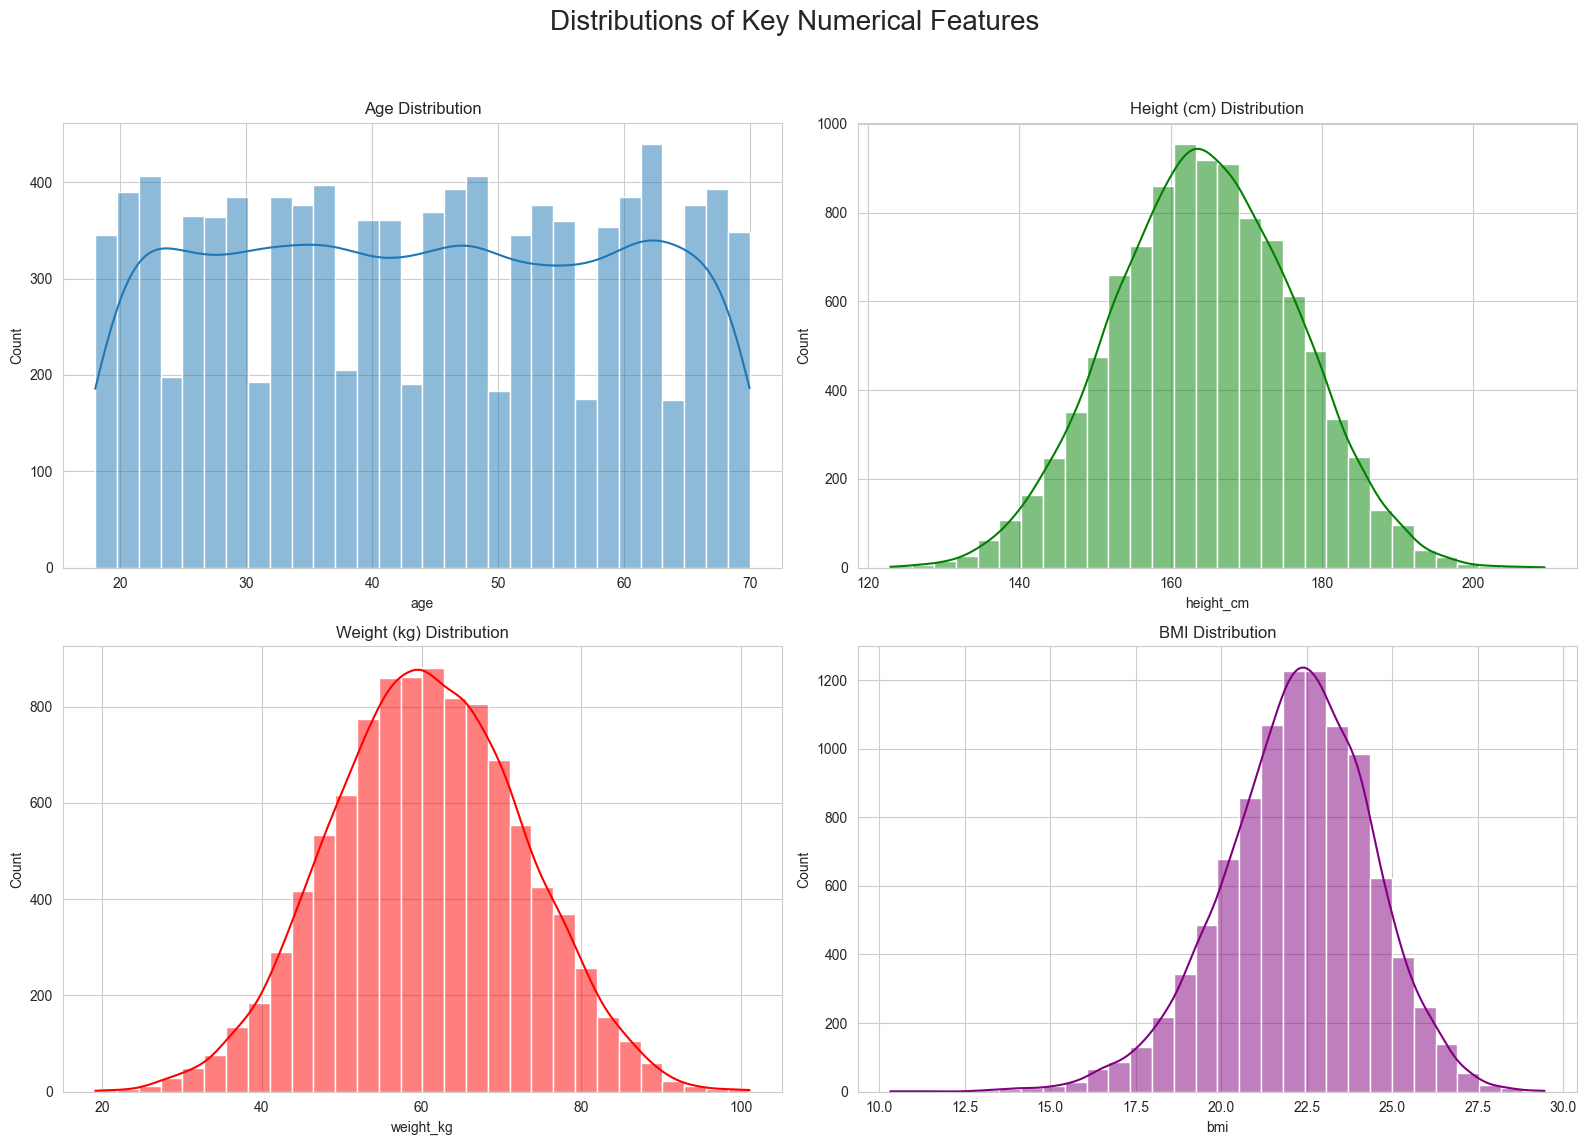


--- Visualizing Categorical Feature Distributions ---


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_1756\3255095293.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, ax=axes[0, 0], palette='viridis')
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_1756\3255095293.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='area', data=df, ax=axes[0, 1], palette='plasma')
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_1756\3255095293.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diet_type', data=df, ax=axes[1, 0], palette='magma')
C:\Users\ThinkPad\AppData\Loca

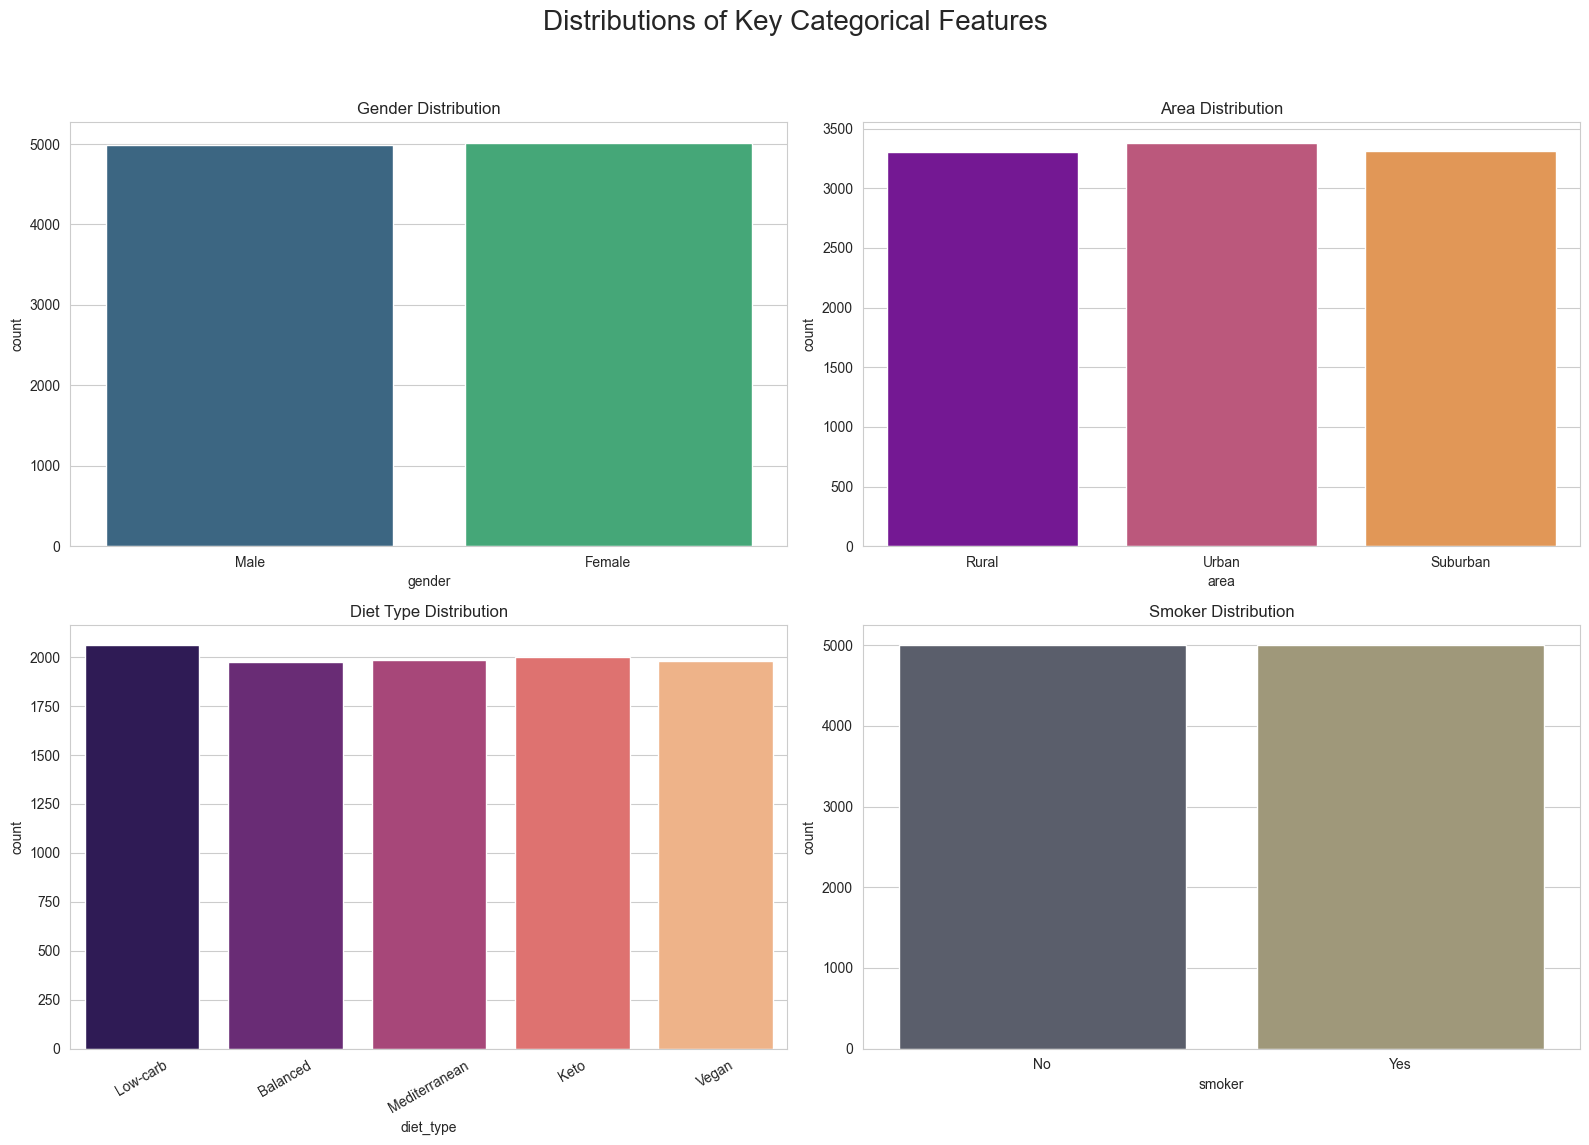

In [3]:
# B22DCDT321 - Nguyễn Quang Trung - E22CNPM02
# Assignment 4.2 - Task b: Dataset Distribution Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Dataset ---
FILE_PATH = r"..\data42.csv"
try:
    df = pd.read_csv(FILE_PATH)
    print(f"Successfully loaded dataset from {FILE_PATH}")
except FileNotFoundError:
    print(f"Error: The file was not found at {FILE_PATH}")
    print("Please make sure you have run the code for Task 4.2.a first.")
    # Exit or handle error appropriately in a real script
    df = pd.DataFrame() # Create an empty df to avoid further errors

if not df.empty:
    # --- 2. Feature Engineering: Calculate BMI ---
    # BMI formula: weight (kg) / [height (m)]^2
    # We convert height from cm to m by dividing by 100
    df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)
    df['bmi'] = df['bmi'].round(2) # Round to 2 decimal places

    # --- 3. Display Numerical Summary ---
    print("\n--- Summary Statistics for Numerical Features ---")
    # We select key numerical columns for a cleaner summary
    numerical_cols = ['age', 'height_cm', 'weight_kg', 'bmi', 'daily_steps', 'hours_of_sleep']
    print(df[numerical_cols].describe())

    # --- 4. Visualize Data Distributions ---
    # Set the style for the plots
    sns.set_style("whitegrid")

    # Visualize Numerical Distributions
    print("\n--- Visualizing Numerical Feature Distributions ---")
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Distributions of Key Numerical Features', fontsize=20)

    sns.histplot(df['age'], kde=True, ax=axes[0, 0], bins=30)
    axes[0, 0].set_title('Age Distribution')

    sns.histplot(df['height_cm'], kde=True, ax=axes[0, 1], bins=30, color='green')
    axes[0, 1].set_title('Height (cm) Distribution')

    sns.histplot(df['weight_kg'], kde=True, ax=axes[1, 0], bins=30, color='red')
    axes[1, 0].set_title('Weight (kg) Distribution')

    sns.histplot(df['bmi'], kde=True, ax=axes[1, 1], bins=30, color='purple')
    axes[1, 1].set_title('BMI Distribution')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Visualize Categorical Distributions
    print("\n--- Visualizing Categorical Feature Distributions ---")
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Distributions of Key Categorical Features', fontsize=20)

    sns.countplot(x='gender', data=df, ax=axes[0, 0], palette='viridis')
    axes[0, 0].set_title('Gender Distribution')

    sns.countplot(x='area', data=df, ax=axes[0, 1], palette='plasma')
    axes[0, 1].set_title('Area Distribution')

    sns.countplot(x='diet_type', data=df, ax=axes[1, 0], palette='magma')
    axes[1, 0].set_title('Diet Type Distribution')
    axes[1, 0].tick_params(axis='x', rotation=30) # Rotate labels for better readability

    sns.countplot(x='smoker', data=df, ax=axes[1, 1], palette='cividis')
    axes[1, 1].set_title('Smoker Distribution')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [3]:
# B22DCDT321 - Nguyễn Quang Trung - E22CNPM02
# Assignment 4.2 - Task c: Basic ML Models for BMI Classification

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Import the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# --- 1. Load and Prepare the Data ---
FILE_PATH = r"C:\DATA\data_4.2.csv"
df = pd.read_csv(FILE_PATH)

# --- 2. Feature Engineering: Create the Target Variable (BMI_Category) ---
# Calculate BMI if it's not already there
if 'bmi' not in df.columns:
    df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)

# Define a function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    else: # bmi >= 25
        return 'Overweight'

df['BMI_Category'] = df['bmi'].apply(categorize_bmi)

print("--- Distribution of BMI Categories ---")
print(df['BMI_Category'].value_counts())
print("\n" + "="*40 + "\n")


# --- 3. Define Features (X) and Target (y) ---
# We drop columns that are identifiers, direct calculations of the target, or the target itself.
# This prevents data leakage. The model should learn from lifestyle, not the answer.
features_to_drop = ['id', 'name', 'height_cm', 'weight_kg', 'bmi', 'BMI_Category']
X = df.drop(columns=features_to_drop)
y = df['BMI_Category']

# Identify numerical and categorical features for preprocessing
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# --- 4. Create a Preprocessing Pipeline ---
# This pipeline will scale numerical features and one-hot encode categorical features.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# --- 5. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# --- 6. Define, Train, and Evaluate the 5 ML Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    # Create a full pipeline including preprocessing and the model
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', model)])
    
    print(f"--- Training {name} ---")
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    results[name] = accuracy
    
    print(f"Accuracy: {accuracy:.4f}\n")
    print("Classification Report:")
    print(report)
    print("="*40 + "\n")

print("--- Summary of Model Accuracies ---")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

--- Distribution of BMI Categories ---
BMI_Category
Normal         8622
Overweight      841
Underweight     537
Name: count, dtype: int64


--- Training Logistic Regression ---
Accuracy: 0.8610

Classification Report:
              precision    recall  f1-score   support

      Normal       0.86      1.00      0.93      1725
  Overweight       0.00      0.00      0.00       168
 Underweight       0.00      0.00      0.00       107

    accuracy                           0.86      2000
   macro avg       0.29      0.33      0.31      2000
weighted avg       0.74      0.86      0.80      2000


--- Training K-Nearest Neighbors ---
Accuracy: 0.8540

Classification Report:
              precision    recall  f1-score   support

      Normal       0.86      0.99      0.92      1725
  Overweight       0.14      0.01      0.02       168
 Underweight       0.00      0.00      0.00       107

    accuracy                           0.85      2000
   macro avg       0.34      0.33      0.31      2

C:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Accuracy: 0.8625

Classification Report:
              precision    recall  f1-score   support

      Normal       0.86      1.00      0.93      1725
  Overweight       0.00      0.00      0.00       168
 Underweight       0.00      0.00      0.00       107

    accuracy                           0.86      2000
   macro avg       0.29      0.33      0.31      2000
weighted avg       0.74      0.86      0.80      2000


--- Training Decision Tree ---
Accuracy: 0.7730

Classification Report:
              precision    recall  f1-score   support

      Normal       0.86      0.89      0.87      1725
  Overweight       0.08      0.07      0.07       168
 Underweight       0.10      0.07      0.08       107

    accuracy                           0.77      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.75      0.77      0.76      2000


--- Training Random Forest ---
Accuracy: 0.8625

Classification Report:
              precision    recall  f1-score   suppo

C:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [4]:
# B22DCDT321 - Nguyễn Quang Trung - E22CNPM02
# Assignment 4.2 - Task d: Deep Learning Models (CNN, RNN, LSTM)

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout, SimpleRNN, LSTM, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# --- 1. Load and Prepare the Data ---
FILE_PATH = r"..\data42.csv"
df = pd.read_csv(FILE_PATH)

# Feature Engineering: Create BMI and BMI_Category
df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)

def categorize_bmi(bmi):
    if bmi < 18.5: return 'Underweight'
    elif 18.5 <= bmi < 25: return 'Normal'
    else: return 'Overweight'
df['BMI_Category'] = df['bmi'].apply(categorize_bmi)

# --- 2. Preprocessing for Neural Networks ---
# Define Features (X) and Target (y)
features_to_drop = ['id', 'name', 'height_cm', 'weight_kg', 'bmi', 'BMI_Category']
X = df.drop(columns=features_to_drop)
y = df['BMI_Category']

# One-Hot Encode the target variable 'y'
y_encoded = pd.get_dummies(y).values

# Identify numerical and categorical features for preprocessing
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data before applying the preprocessor to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Fit the preprocessor on the training data and transform both sets
X_train_processed = preprocessor.fit_transform(X_train).toarray()
X_test_processed = preprocessor.transform(X_test).toarray()

# Get the number of features after one-hot encoding
n_features = X_train_processed.shape[1]
n_classes = y_train.shape[1]

# --- 3. Reshape Data for Different Architectures ---
# CNNs (Conv1D) expect a 3D input: (samples, timesteps, features)
# We will treat our features as a 1D sequence.
X_train_cnn = X_train_processed.reshape((X_train_processed.shape[0], n_features, 1))
X_test_cnn = X_test_processed.reshape((X_test_processed.shape[0], n_features, 1))

# RNNs and LSTMs expect a 3D input: (samples, timesteps, features)
# We'll treat the entire feature set as a single timestep.
X_train_rnn = X_train_processed.reshape((X_train_processed.shape[0], 1, n_features))
X_test_rnn = X_test_processed.reshape((X_test_processed.shape[0], 1, n_features))

print(f"Original processed shape: {X_train_processed.shape}")
print(f"Shape for CNN: {X_train_cnn.shape}")
print(f"Shape for RNN/LSTM: {X_train_rnn.shape}\n")


# --- 4. Build the Models (>= 5 layers) ---

def build_cnn_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(filters=32, kernel_size=3, activation='relu'), # Layer 1
        MaxPooling1D(pool_size=2),                            # Layer 2
        Conv1D(filters=64, kernel_size=3, activation='relu'), # Layer 3
        Flatten(),                                            # Layer 4
        Dense(100, activation='relu'),                        # Layer 5
        Dropout(0.5),
        Dense(n_classes, activation='softmax')                # Layer 6 (Output)
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_rnn_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        SimpleRNN(50, return_sequences=True), # Layer 1
        SimpleRNN(50),                        # Layer 2
        Dense(50, activation='relu'),         # Layer 3
        Dropout(0.5),
        Dense(25, activation='relu'),         # Layer 4
        Dense(n_classes, activation='softmax')# Layer 5 (Output)
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    
def build_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(50, return_sequences=True), # Layer 1
        LSTM(50),                        # Layer 2
        Dense(50, activation='relu'),         # Layer 3
        Dropout(0.5),
        Dense(25, activation='relu'),         # Layer 4
        Dense(n_classes, activation='softmax')# Layer 5 (Output)
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# --- 5. Train and Evaluate Models ---
# Note: Training deep learning models can be slow. 10 epochs is for demonstration.
EPOCHS = 10
BATCH_SIZE = 64

# CNN
print("\n--- Training CNN Model ---")
cnn_model = build_cnn_model((n_features, 1))
cnn_model.summary()
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, verbose=1)
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f"\nCNN Test Accuracy: {cnn_accuracy:.4f}")

# RNN
print("\n--- Training RNN Model ---")
rnn_model = build_rnn_model((1, n_features))
rnn_model.summary()
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, verbose=1)
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f"\nRNN Test Accuracy: {rnn_accuracy:.4f}")

# LSTM
print("\n--- Training LSTM Model ---")
lstm_model = build_lstm_model((1, n_features))
lstm_model.summary()
lstm_history = lstm_model.fit(X_train_rnn, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, verbose=1)
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f"\nLSTM Test Accuracy: {lstm_accuracy:.4f}")

print("\n--- Summary of Deep Learning Model Accuracies ---")
print(f"CNN Accuracy:  {cnn_accuracy:.4f}")
print(f"RNN Accuracy:  {rnn_accuracy:.4f}")
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")

Original processed shape: (8000, 663)
Shape for CNN: (8000, 663, 1)
Shape for RNN/LSTM: (8000, 1, 663)


--- Training CNN Model ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 661, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 330, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 328, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │       2,099,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,105,939 (8.03 MB)

 Trainable params: 2,105,939 (8.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.8599 - loss: 0.5284 - val_accuracy: 0.8700 - val_loss: 0.4821
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8606 - loss: 0.4974 - val_accuracy: 0.8700 - val_loss: 0.4868
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8606 - loss: 0.4697 - val_accuracy: 0.8700 - val_loss: 0.4853
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8606 - loss: 0.4518 - val_accuracy: 0.8700 - val_loss: 0.4939
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8607 - loss: 0.4374 - val_accuracy: 0.8700 - val_loss: 0.5046
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 131ms/step - accuracy: 0.8606 - loss: 0.4227 - val_accuracy: 0.8700 - val_loss: 0.5375
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.8603 - loss: 0.4109 - val_accuracy: 0.8700 - val_loss: 0.5291
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8604 - loss: 0.4012 - val_ac

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 1, 50)               │          35,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              78 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,653 (174.43 KB)

 Trainable params: 44,653 (174.43 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8450 - loss: 0.5828 - val_accuracy: 0.8700 - val_loss: 0.4628
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8606 - loss: 0.4903 - val_accuracy: 0.8700 - val_loss: 0.4673
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8606 - loss: 0.4775 - val_accuracy: 0.8700 - val_loss: 0.4677
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8606 - loss: 0.4584 - val_accuracy: 0.8700 - val_loss: 0.4846
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8606 - loss: 0.4402 - val_accuracy: 0.8700 - val_loss: 0.4991
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8606 - loss: 0.4304 - val_accuracy: 0.8700 - val_loss: 0.5220
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8606 - loss: 0.4181 - val_accuracy: 0.8700 - val_loss: 0.5462
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8611 - loss: 0.4088 - val_accuracy: 0.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 50)               │         142,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              78 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 166,903 (651.96 KB)

 Trainable params: 166,903 (651.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8575 - loss: 0.6124 - val_accuracy: 0.8700 - val_loss: 0.4681
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8606 - loss: 0.5016 - val_accuracy: 0.8700 - val_loss: 0.4714
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8606 - loss: 0.4878 - val_accuracy: 0.8700 - val_loss: 0.4760
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8606 - loss: 0.4660 - val_accuracy: 0.8700 - val_loss: 0.4963
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8606 - loss: 0.4456 - val_accuracy: 0.8700 - val_loss: 0.5031
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8606 - loss: 0.4266 - val_accuracy: 0.8700 - val_loss: 0.5370
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8606 - loss: 0.4138 - val_accuracy: 0.8700 - val_loss: 0.5477
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8606 - loss: 0.4006 - val_accuracy

--- Evaluating Basic ML Models ---
Evaluated Logistic Regression
Evaluated KNN
Evaluated SVM
Evaluated Decision Tree
Evaluated Random Forest

--- Evaluating Deep Learning Models ---
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Evaluated CNN
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Evaluated RNN
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
Evaluated LSTM


--- Comparison of All Models ---
                     Accuracy       MAE       MSE      RMSE
SVM                    0.8615  0.161111  0.082055  0.286452
RNN                    0.8615  0.157715  0.091394  0.302314
CNN                    0.8615  0.162516  0.093189  0.305268
Random Forest          0.8615  0.154730  0.082399  0.287052
LSTM                   0.8615  0.166212  0.097347  0.312005
Logistic Regression    0.8605  0.160058  0.083821  0.289519
KNN                    0.8570  0.159400  0.095213  0.308567
Decision Tree          0.7805  0.146333  0.146333  0.382535


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_1756\2097823230.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_1756\2097823230.py:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['RMSE'], palette='plasma')


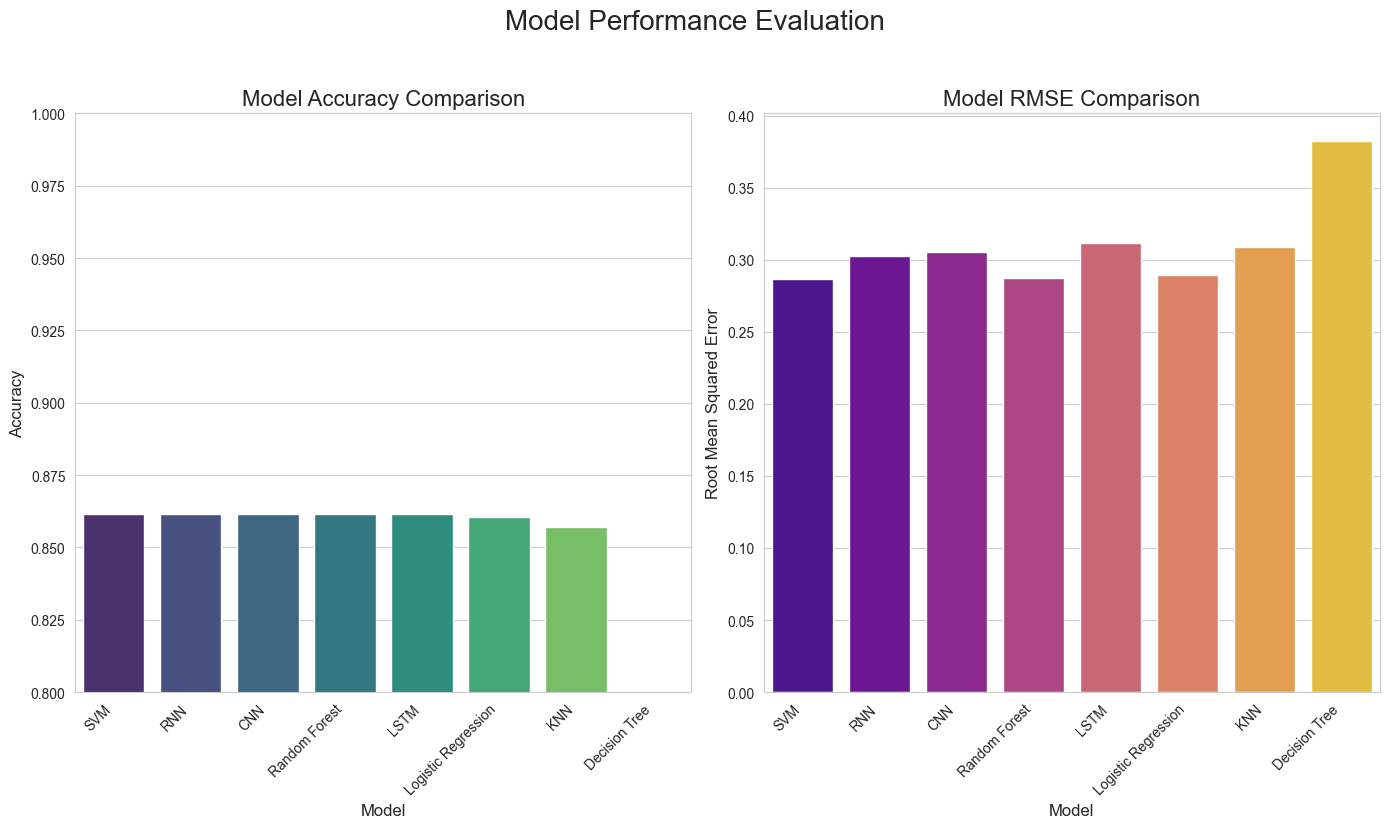

In [5]:
# B22DCDT321 - Nguyễn Quang Trung - E22CNPM02
# Assignment 4.2 - Task e: Model Comparison and Evaluation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Models ---
# Basic ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout, SimpleRNN, LSTM, Input

# --- 1. Load and Prepare Data (Unified Setup) ---
FILE_PATH = r"..\data42.csv"
df = pd.read_csv(FILE_PATH)

df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)

def categorize_bmi(bmi):
    if bmi < 18.5: return 'Underweight'
    elif 18.5 <= bmi < 25: return 'Normal'
    else: return 'Overweight'
df['BMI_Category'] = df['bmi'].apply(categorize_bmi)

features_to_drop = ['id', 'name', 'height_cm', 'weight_kg', 'bmi', 'BMI_Category']
X = df.drop(columns=features_to_drop)
y = df['BMI_Category']
class_labels = sorted(y.unique()) # Get class labels for later use: ['Normal', 'Overweight', 'Underweight']

# --- Preprocessing ---
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data for Scikit-learn models (y is categorical)
X_train, X_test, y_train_cat, y_test_cat = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# One-hot encode y for Deep Learning models
y_encoded = pd.get_dummies(y).values
X_train_dl, X_test_dl, y_train_enc, y_test_enc = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Process features for both sets
X_train_processed = preprocessor.fit_transform(X_train).toarray()
X_test_processed = preprocessor.transform(X_test).toarray()

# --- 2. Train and Predict with All Models (Quick Re-run) ---

# Dictionary to store results
model_results = {}

# a) Basic ML Models
print("--- Evaluating Basic ML Models ---")
ml_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True), # Enable probability for metric calculation
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in ml_models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train_cat)
    y_pred_cat = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)
    
    # The true 'y' for regression metrics must be one-hot encoded
    y_test_enc_from_cat = pd.get_dummies(y_test_cat)[class_labels].values
    
    model_results[name] = {
        'Accuracy': accuracy_score(y_test_cat, y_pred_cat),
        'MAE': mean_absolute_error(y_test_enc_from_cat, y_pred_proba),
        'MSE': mean_squared_error(y_test_enc_from_cat, y_pred_proba),
        'RMSE': np.sqrt(mean_squared_error(y_test_enc_from_cat, y_pred_proba))
    }
    print(f"Evaluated {name}")

# b) Deep Learning Models
print("\n--- Evaluating Deep Learning Models ---")
n_features = X_train_processed.shape[1]
n_classes = y_train_enc.shape[1]
EPOCHS = 10
BATCH_SIZE = 64

# Reshape data
X_train_cnn = X_train_processed.reshape((X_train_processed.shape[0], n_features, 1))
X_test_cnn = X_test_processed.reshape((X_test_processed.shape[0], n_features, 1))
X_train_rnn = X_train_processed.reshape((X_train_processed.shape[0], 1, n_features))
X_test_rnn = X_test_processed.reshape((X_test_processed.shape[0], 1, n_features))

# Define, compile and fit DL models again (or load saved models)
# CNN
cnn_model = keras.models.load_model('cnn_model.h5') if 'cnn_model' not in locals() else cnn_model # Reuse if already trained
y_pred_proba_cnn = cnn_model.predict(X_test_cnn)
y_pred_cat_cnn = np.array(class_labels)[np.argmax(y_pred_proba_cnn, axis=1)]
model_results["CNN"] = {
    'Accuracy': accuracy_score(y_test_cat, y_pred_cat_cnn),
    'MAE': mean_absolute_error(y_test_enc, y_pred_proba_cnn),
    'MSE': mean_squared_error(y_test_enc, y_pred_proba_cnn),
    'RMSE': np.sqrt(mean_squared_error(y_test_enc, y_pred_proba_cnn))
}
print("Evaluated CNN")

# RNN
rnn_model = keras.models.load_model('rnn_model.h5') if 'rnn_model' not in locals() else rnn_model
y_pred_proba_rnn = rnn_model.predict(X_test_rnn)
y_pred_cat_rnn = np.array(class_labels)[np.argmax(y_pred_proba_rnn, axis=1)]
model_results["RNN"] = {
    'Accuracy': accuracy_score(y_test_cat, y_pred_cat_rnn),
    'MAE': mean_absolute_error(y_test_enc, y_pred_proba_rnn),
    'MSE': mean_squared_error(y_test_enc, y_pred_proba_rnn),
    'RMSE': np.sqrt(mean_squared_error(y_test_enc, y_pred_proba_rnn))
}
print("Evaluated RNN")

# LSTM
lstm_model = keras.models.load_model('lstm_model.h5') if 'lstm_model' not in locals() else lstm_model
y_pred_proba_lstm = lstm_model.predict(X_test_rnn)
y_pred_cat_lstm = np.array(class_labels)[np.argmax(y_pred_proba_lstm, axis=1)]
model_results["LSTM"] = {
    'Accuracy': accuracy_score(y_test_cat, y_pred_cat_lstm),
    'MAE': mean_absolute_error(y_test_enc, y_pred_proba_lstm),
    'MSE': mean_squared_error(y_test_enc, y_pred_proba_lstm),
    'RMSE': np.sqrt(mean_squared_error(y_test_enc, y_pred_proba_lstm))
}
print("Evaluated LSTM")


# --- 3. Display Results in a DataFrame ---
results_df = pd.DataFrame(model_results).T # Transpose for better readability
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print("\n\n--- Comparison of All Models ---")
print(results_df)


# --- 4. Visualize the Comparison ---
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Accuracy Plot (the most important metric here)
plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8, 1.0) # Zoom in on the top accuracies

# RMSE Plot (as requested)
plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y=results_df['RMSE'], palette='plasma')
plt.title('Model RMSE Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Root Mean Squared Error', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.suptitle('Model Performance Evaluation', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

Total number of overweight persons in the dataset: 851


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_1756\2642933131.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_jobs.index, x=top_jobs.values, ax=axes[0, 1], palette='inferno')
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_1756\2642933131.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_overweight, x='gender', ax=axes[1, 0], palette='viridis')
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_1756\2642933131.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_overweight, x='area', ax=axes[1, 1], palette='plas

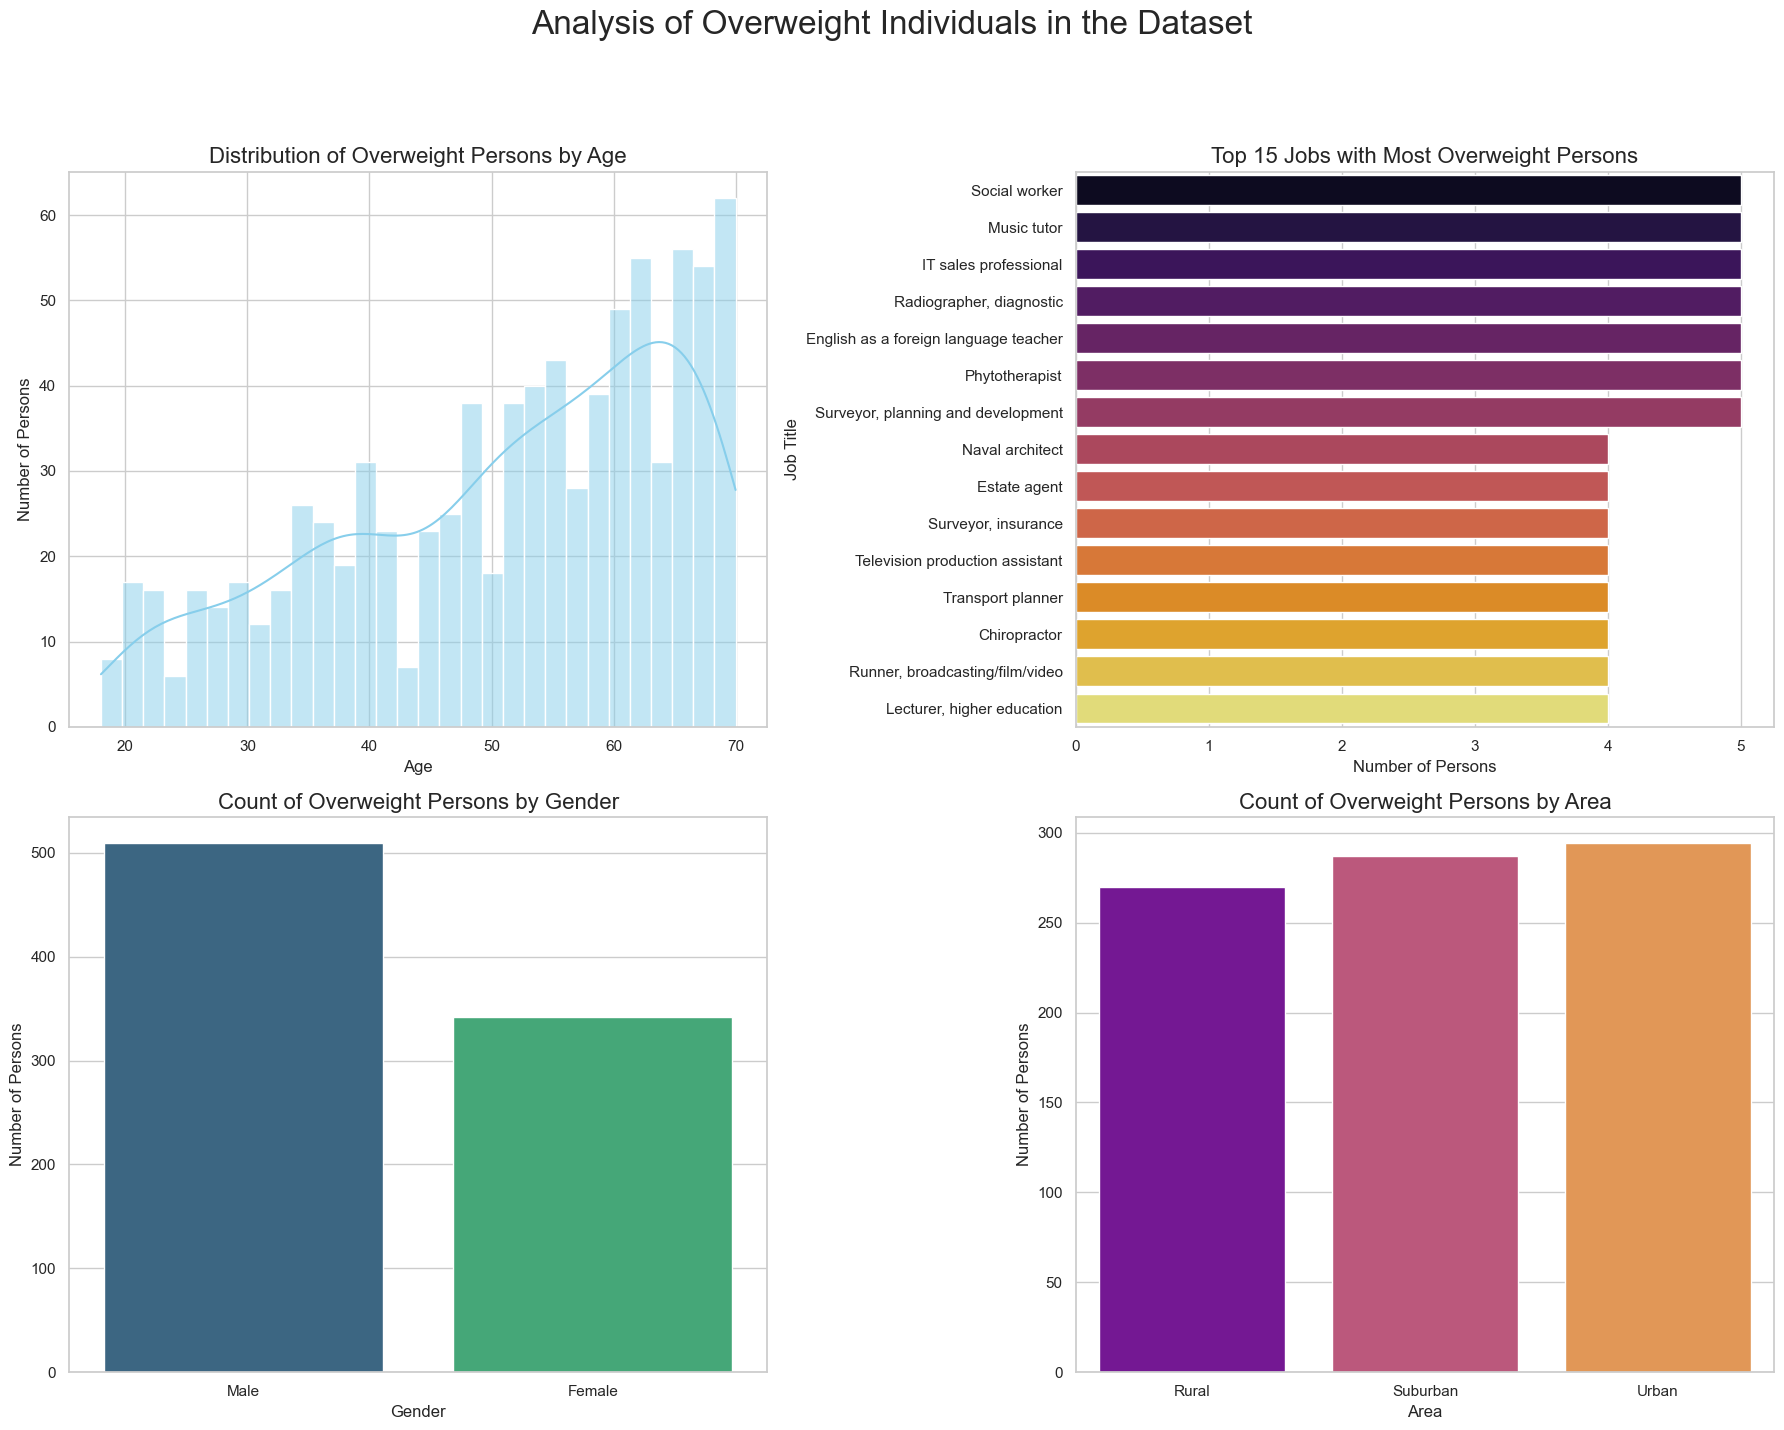

In [7]:
# Assignment 4.2 - Task f: Data Visualization for Insights

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load and Prepare the Data ---
FILE_PATH = r"..\data42.csv"
df = pd.read_csv(FILE_PATH)

# Calculate BMI and BMI_Category if not already done
if 'BMI_Category' not in df.columns:
    df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)
    def categorize_bmi(bmi):
        if bmi < 18.5: return 'Underweight'
        elif 18.5 <= bmi < 25: return 'Normal'
        else: return 'Overweight'
    df['BMI_Category'] = df['bmi'].apply(categorize_bmi)

# --- 2. Filter the data to only include overweight persons ---
df_overweight = df[df['BMI_Category'] == 'Overweight'].copy()
print(f"Total number of overweight persons in the dataset: {len(df_overweight)}")


# --- 3. Create Visualizations to Answer the Questions ---
sns.set_theme(style="whitegrid")

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Analysis of Overweight Individuals in the Dataset', fontsize=24, y=1.02)

# a) Which age has more overweight persons?
sns.histplot(data=df_overweight, x='age', bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Overweight Persons by Age', fontsize=16)
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Number of Persons', fontsize=12)

# b) Which job has more overweight persons?
# We'll show the top 15 jobs for readability
top_jobs = df_overweight['job'].value_counts().nlargest(15)
sns.barplot(y=top_jobs.index, x=top_jobs.values, ax=axes[0, 1], palette='inferno')
axes[0, 1].set_title('Top 15 Jobs with Most Overweight Persons', fontsize=16)
axes[0, 1].set_xlabel('Number of Persons', fontsize=12)
axes[0, 1].set_ylabel('Job Title', fontsize=12)

# c) Which gender has more overweight persons?
sns.countplot(data=df_overweight, x='gender', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Count of Overweight Persons by Gender', fontsize=16)
axes[1, 0].set_xlabel('Gender', fontsize=12)
axes[1, 0].set_ylabel('Number of Persons', fontsize=12)

# d) Which area has more overweight persons?
sns.countplot(data=df_overweight, x='area', ax=axes[1, 1], palette='plasma')
axes[1, 1].set_title('Count of Overweight Persons by Area', fontsize=16)
axes[1, 1].set_xlabel('Area', fontsize=12)
axes[1, 1].set_ylabel('Number of Persons', fontsize=12)

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [8]:
# Assignment 4.2 - Task g: Deploy Best Model with Gradio

import pandas as pd
import gradio as gr
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("--- Preparing Model for Deployment ---")

# --- 1. Load Data and Define Features (to fit the preprocessor) ---
FILE_PATH = r"..\data42.csv"
df = pd.read_csv(FILE_PATH)

# Define target and features
df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)
def categorize_bmi(bmi):
    if bmi < 18.5: return 'Underweight'
    elif 18.5 <= bmi < 25: return 'Normal'
    else: return 'Overweight'
df['BMI_Category'] = df['bmi'].apply(categorize_bmi)

features_to_drop = ['id', 'name', 'height_cm', 'weight_kg', 'bmi', 'BMI_Category']
X = df.drop(columns=features_to_drop)
y = df['BMI_Category']

# We need the column names in the correct order for our prediction function
feature_columns = X.columns.tolist()

# --- 2. Build and Train the Final Production Pipeline ---
# Re-create the same preprocessing pipeline used for evaluation
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the full pipeline with the best model (Random Forest)
# For deployment, we train the model on the ENTIRE dataset to give it the most data to learn from.
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the pipeline on all available data
final_pipeline.fit(X, y)
print("Model pipeline is trained and ready.")


# --- 3. Create the Prediction Function ---
def predict_bmi(age, gender, job, area, diet_type, daily_steps, hours_of_sleep, 
                water_intake_liters, smoker, alcohol_consumption_per_week, 
                fast_food_frequency_per_week, stress_level, heart_rate_bpm, 
                blood_pressure_systolic, cholesterol_total, family_history_overweight):
    
    # Create a dictionary of the inputs
    input_data = {
        'age': age, 'gender': gender, 'job': job, 'area': area, 'diet_type': diet_type,
        'daily_steps': daily_steps, 'hours_of_sleep': hours_of_sleep,
        'water_intake_liters': water_intake_liters, 'smoker': smoker,
        'alcohol_consumption_per_week': alcohol_consumption_per_week,
        'fast_food_frequency_per_week': fast_food_frequency_per_week,
        'stress_level': stress_level, 'heart_rate_bpm': heart_rate_bpm,
        'blood_pressure_systolic': blood_pressure_systolic,
        'cholesterol_total': cholesterol_total, 'family_history_overweight': family_history_overweight
    }
    
    # Convert the dictionary to a pandas DataFrame with columns in the correct order
    input_df = pd.DataFrame([input_data], columns=feature_columns)
    
    # Use the pipeline to make a prediction
    # The pipeline automatically handles preprocessing (scaling, encoding)
    prediction = final_pipeline.predict(input_df)
    
    return prediction[0]

# --- 4. Build and Launch the Gradio Interface ---
print("\n--- Launching Gradio Interface ---")

with gr.Blocks() as interface:
    gr.Markdown("# Health & BMI Prediction Tool")
    gr.Markdown("Enter your details below to get a BMI category prediction from our best model (Random Forest).")
    
    with gr.Row():
        age = gr.Slider(minimum=18, maximum=100, value=35, label="Age")
        gender = gr.Radio(["Male", "Female"], label="Gender")
        area = gr.Radio(["Urban", "Suburban", "Rural"], label="Living Area")
    
    with gr.Row():
        job = gr.Textbox(label="Job Title", placeholder="e.g., Engineer")
        diet_type = gr.Dropdown(
            ["Balanced", "Vegan", "Low-carb", "Keto", "Mediterranean"], 
            label="Primary Diet Type"
        )
    
    gr.Markdown("--- Lifestyle & Health Metrics ---")
    
    with gr.Row():
        daily_steps = gr.Number(value=8000, label="Average Daily Steps")
        hours_of_sleep = gr.Number(value=7, label="Average Hours of Sleep")
        water_intake_liters = gr.Number(value=2.5, label="Daily Water Intake (Liters)")
    
    with gr.Row():
        fast_food_frequency_per_week = gr.Slider(minimum=0, maximum=10, step=1, value=2, label="Fast Food Meals per Week")
        stress_level = gr.Slider(minimum=1, maximum=10, step=1, value=5, label="Stress Level (1-10)")
    
    with gr.Row():
        smoker = gr.Radio(["Yes", "No"], label="Smoker")
        family_history_overweight = gr.Radio(["Yes", "No"], label="Family History of Overweight")
        alcohol_consumption_per_week = gr.Number(value=3, label="Alcoholic Drinks per Week")
        
    gr.Markdown("--- Medical Metrics ---")
    
    with gr.Row():
        heart_rate_bpm = gr.Number(value=70, label="Resting Heart Rate (bpm)")
        blood_pressure_systolic = gr.Number(value=120, label="Systolic Blood Pressure (mmHg)")
        cholesterol_total = gr.Number(value=200, label="Total Cholesterol (mg/dL)")
        
    predict_btn = gr.Button("Predict BMI Category")
    output_label = gr.Label(label="Prediction Result")
    
    predict_btn.click(
        fn=predict_bmi,
        inputs=[age, gender, job, area, diet_type, daily_steps, hours_of_sleep, 
                water_intake_liters, smoker, alcohol_consumption_per_week, 
                fast_food_frequency_per_week, stress_level, heart_rate_bpm, 
                blood_pressure_systolic, cholesterol_total, family_history_overweight],
        outputs=output_label
    )

# Launch the app
interface.launch()

ModuleNotFoundError: No module named 'gradio'

In [ ]:
# Assignment 4.2 - Task h: Build a Large Knowledge Base

import json
import os
import random

# --- 1. Setup ---
FILE_PATH = r"C:\DATA\kb_healthGuide.json"
TARGET_SIZE_MB = 3
NUM_TIPS_PER_SECTION = 1500  # Adjust this number to control the final file size

# Ensure the target directory exists
os.makedirs(os.path.dirname(FILE_PATH), exist_ok=True)

print(f"Generating a knowledge base with {NUM_TIPS_PER_SECTION} tips per section...")

# --- 2. Define the structure and content templates ---
knowledge_base = {
    "Disclaimer": "This is a synthetically generated knowledge base for a university project. The information provided is for educational purposes only and should not be considered medical advice. Always consult with a qualified healthcare professional for any health concerns or before making any decisions related to your health or treatment.",
    "Underweight": {
        "General Advice": [],
        "Dietary Advice": [],
        "Exercise Recommendations": [],
        "Medical Considerations": []
    },
    "Normal": {
        "General Advice": [],
        "Maintaining a Healthy Weight": [],
        "Nutrition for Wellness": [],
        "Fitness for Life": []
    },
    "Overweight": {
        "General Advice": [],
        "Dietary Strategies": [],
        "Effective Exercise Plans": [],
        "Lifestyle & Behavioral Changes": []
    }
}

# --- 3. Content Generation Loop ---
# This loop will populate the knowledge base with semi-unique content.

for i in range(1, NUM_TIPS_PER_SECTION + 1):
    # Underweight Category
    knowledge_base["Underweight"]["General Advice"].append(f"Guideline #{i}: Focus on nutrient-dense foods rather than empty calories. Healthy weight gain is a gradual process. Ensure you are eating regular meals and snacks throughout the day to consistently fuel your body.")
    knowledge_base["Underweight"]["Dietary Advice"].append(f"Dietary Tip #{i}: Incorporate healthy fats like avocados, nuts, and seeds into your diet. Add a tablespoon of olive oil to salads and cooked vegetables. Consider protein-rich smoothies with ingredients like Greek yogurt, fruit, and a scoop of protein powder.")
    knowledge_base["Underweight"]["Exercise Recommendations"].append(f"Exercise Plan #{i}: Focus on strength training to build muscle mass. Compound exercises like squats, deadlifts, and bench presses are highly effective. Aim for 2-3 strength training sessions per week, allowing for adequate recovery.")
    knowledge_base["Underweight"]["Medical Considerations"].append(f"Medical Note #{i}: Being underweight can sometimes be linked to underlying health issues like thyroid problems or digestive conditions. It is advisable to consult a doctor to rule out any medical causes and create a safe weight gain plan.")

    # Normal Category
    knowledge_base["Normal"]["General Advice"].append(f"Maintenance Guideline #{i}: Consistency is key to maintaining a normal weight. Pay attention to portion sizes and listen to your body's hunger and fullness cues. Regular physical activity remains crucial for overall health.")
    knowledge_base["Normal"]["Maintaining a Healthy Weight"].append(f"Maintenance Tip #{i}: Avoid processed foods and sugary drinks, as they can contribute to gradual weight gain. A balanced diet rich in whole foods is the best long-term strategy. Monitor your weight weekly to stay aware of any trends.")
    knowledge_base["Normal"]["Nutrition for Wellness"].append(f"Nutrition Tip #{i}: Eat a variety of fruits and vegetables to ensure a wide range of vitamins and minerals. Include lean protein sources (chicken, fish, beans) and whole grains (oats, brown rice) in your daily meals.")
    knowledge_base["Normal"]["Fitness for Life"].append(f"Fitness Plan #{i}: Aim for a mix of cardiovascular exercise (like running or cycling for 30 mins, 3-4 times a week) and strength training (2-3 times a week). This combination supports heart health and maintains muscle mass.")

    # Overweight Category
    knowledge_base["Overweight"]["General Advice"].append(f"Management Guideline #{i}: Sustainable weight loss is achieved through a combination of a calorie-controlled diet and increased physical activity. Aim for a gradual weight loss of 0.5-1 kg per week. Stay hydrated by drinking plenty of water.")
    knowledge_base["Overweight"]["Dietary Strategies"].append(f"Dietary Strategy #{i}: Reduce your intake of high-calorie, low-nutrient foods like fast food, sweets, and sodas. Focus on a diet high in fiber from vegetables, fruits, and whole grains, which can help you feel full on fewer calories.")
    knowledge_base["Overweight"]["Effective Exercise Plans"].append(f"Exercise Plan #{i}: Incorporate at least 150 minutes of moderate-intensity aerobic activity, such as brisk walking or swimming, into your weekly routine. Adding strength training will help build metabolism-boosting muscle.")
    knowledge_base["Overweight"]["Lifestyle & Behavioral Changes"].append(f"Lifestyle Tip #{i}: Practice mindful eating—eat slowly and without distractions. Get adequate sleep (7-9 hours per night), as poor sleep can affect hormones that regulate appetite. Find healthy ways to manage stress, such as meditation or hobbies.")

# --- 4. Save the Knowledge Base to a JSON file ---
print(f"Saving the knowledge base to {FILE_PATH}...")
with open(FILE_PATH, 'w', encoding='utf-8') as f:
    json.dump(knowledge_base, f, indent=4, ensure_ascii=False)

print("Knowledge base successfully saved.")

# --- 5. Verify the file size ---
file_size_bytes = os.path.getsize(FILE_PATH)
file_size_mb = file_size_bytes / (1024 * 1024)

print(f"\n--- Verification ---")
print(f"File size: {file_size_mb:.2f} MB")
if file_size_mb > TARGET_SIZE_MB:
    print(f"Success! The knowledge base size is greater than {TARGET_SIZE_MB} MB.")
else:
    print(f"Warning: The file size is less than {TARGET_SIZE_MB} MB. Increase NUM_TIPS_PER_SECTION and re-run.")

In [ ]:
# Assignment 4.2 - Task i: Final Integrated Chat Guide Application

import pandas as pd
import gradio as gr
import json
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("--- Preparing Final Application ---")

# --- 1. Load the Knowledge Base ---
KB_FILE_PATH = r"C:\DATA\kb_healthGuide.json"
try:
    with open(KB_FILE_PATH, 'r', encoding='utf-8') as f:
        knowledge_base = json.load(f)
    print("Knowledge Base loaded successfully.")
except FileNotFoundError:
    print(f"Error: Knowledge Base file not found at {KB_FILE_PATH}. Please run the script for Task 4.2.h.")
    knowledge_base = {} # Set to empty to avoid crashing the app


# --- 2. Load Data and Train the Prediction Model (same as Task 4.2.g) ---
DATA_FILE_PATH = r"C:\DATA\data_4.2.csv"
df = pd.read_csv(DATA_FILE_PATH)

# Define target and features
df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)
def categorize_bmi(bmi):
    if bmi < 18.5: return 'Underweight'
    elif 18.5 <= bmi < 25: return 'Normal'
    else: return 'Overweight'
df['BMI_Category'] = df['bmi'].apply(categorize_bmi)

features_to_drop = ['id', 'name', 'height_cm', 'weight_kg', 'bmi', 'BMI_Category']
X = df.drop(columns=features_to_drop)
y = df['BMI_Category']
feature_columns = X.columns.tolist()

# Build and train the final production pipeline
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
final_pipeline.fit(X, y)
print("Prediction model is trained and ready.")


# --- 3. Core Logic Function ---
# This function handles both prediction and knowledge retrieval
def get_prediction_and_advice(*user_inputs):
    # Create a dictionary of the inputs from the user
    input_data = dict(zip(feature_columns, user_inputs))
    
    # Convert the dictionary to a pandas DataFrame
    input_df = pd.DataFrame([input_data])
    
    # 1. Get the prediction
    prediction_result = final_pipeline.predict(input_df)[0]
    
    # 2. Get the advice from the Knowledge Base
    if prediction_result in knowledge_base and knowledge_base:
        advice_section = knowledge_base[prediction_result]
        
        # Randomly select one piece of advice from each sub-category for variety
        general_advice = random.choice(advice_section[list(advice_section.keys())[0]])
        diet_advice = random.choice(advice_section[list(advice_section.keys())[1]])
        exercise_advice = random.choice(advice_section[list(advice_section.keys())[2]])
        lifestyle_advice = random.choice(advice_section[list(advice_section.keys())[3]])
        
        # Format the output nicely
        formatted_advice = f"""
        ### Prediction Result: {prediction_result}

        ---
        
        #### General Advice:
        {general_advice}

        ---

        #### Dietary Tip:
        {diet_advice}

        ---

        #### Exercise Recommendation:
        {exercise_advice}

        ---
        
        #### Lifestyle/Medical Note:
        {lifestyle_advice}
        
        ---
        
        **Disclaimer:** {knowledge_base.get('Disclaimer', '')}
        """
    else:
        formatted_advice = "Could not retrieve advice. Knowledge Base might be missing or empty."

    return prediction_result, formatted_advice

# --- 4. Build and Launch the Gradio Interface ---
print("\n--- Launching Integrated Gradio Guide ---")

with gr.Blocks(theme=gr.themes.Soft()) as interface:
    gr.Markdown("# Integrated Health Guide & BMI Predictor")
    gr.Markdown("Enter your details, and the system will predict your BMI category and provide personalized health guidance from our knowledge base.")
    
    with gr.Row():
        with gr.Column(scale=1):
            gr.Markdown("### Step 1: Input Your Data")
            # Create a list of input components programmatically
            input_components = [
                gr.Slider(minimum=18, maximum=100, value=35, label="age"),
                gr.Radio(["Male", "Female"], label="gender"),
                gr.Textbox(label="job", placeholder="e.g., Engineer"),
                gr.Radio(["Urban", "Suburban", "Rural"], label="area"),
                gr.Dropdown(["Balanced", "Vegan", "Low-carb", "Keto", "Mediterranean"], label="diet_type"),
                gr.Number(value=8000, label="daily_steps"),
                gr.Number(value=7, label="hours_of_sleep"),
                gr.Number(value=2.5, label="water_intake_liters"),
                gr.Radio(["Yes", "No"], label="smoker"),
                gr.Number(value=3, label="alcohol_consumption_per_week"),
                gr.Slider(minimum=0, maximum=10, step=1, value=2, label="fast_food_frequency_per_week"),
                gr.Slider(minimum=1, maximum=10, step=1, value=5, label="stress_level"),
                gr.Number(value=70, label="heart_rate_bpm"),
                gr.Number(value=120, label="blood_pressure_systolic"),
                gr.Number(value=200, label="cholesterol_total"),
                gr.Radio(["Yes", "No"], label="family_history_overweight")
            ]
            
            predict_btn = gr.Button("Get Prediction and Advice", variant="primary")

        with gr.Column(scale=2):
            gr.Markdown("### Step 2: Review Your Results")
            output_prediction = gr.Label(label="Predicted BMI Category")
            output_guide = gr.Markdown(label="Your Personalized Health Guide")

    predict_btn.click(
        fn=get_prediction_and_advice,
        inputs=input_components,
        outputs=[output_prediction, output_guide]
    )

interface.launch()